1. Объясните,  как  компьютерное  зрение  интерпретирует  цвет,  и  перечислите 
ключевые различия между моделями цвета RGB, CIE XYZ, и CIELAB. Как эти 
модели используются в обработке изображений, и какие их свойства делают их подходящими для конкретных приложений в области компьютерного зрения? 

2.  Напишите код на Python для реализации стохастического градиентного спуска и 
протестируйте его на наборе данных для линейной регрессии. 
 

| Характеристика  | RGB | YUV | HSV | CMYK | CIE XYZ | CIELAB |
|---------------|-----|-----|-----|------|--------|--------|
| **Тип модели** | Аппаратная, аддитивная | Кодировочная, субтрактивная | Перцепционная | Субтрактивная | Перцепционная, основана на зрении человека | Перцепционная, унифицированная |
| **Компоненты** | (R, G, B) – интенсивности каналов | (Y – яркость, U, V – цветоразность) | (H – тон, S – насыщенность, V – значение) | (C – циан, M – маджента, Y – желтый, K – черный) | (X, Y, Z) – триколорные стимулы | (L* – яркость, a* – красно-зеленый баланс, b* – сине-желтый баланс) |
| **Формат данных** | 8-битный (0-255) или плавающая точка (0-1) | 8-битный (0-255) или плавающая точка | Угловые градусы (H: 0-360°), проценты (S, V: 0-100%) | Проценты (0-100%) | Плавающая точка | Плавающая точка |
| **Линейность** | Линейное смешение цветов | Нелинейное, учитывает яркость | Нелинейное | Линейное для печати | Основана на измерениях восприятия | Нелинейно приближает восприятие человека |
| **Используется для** | Цифровые дисплеи, обработка изображений | Видеокодирование, сжатие, передача | Цветокоррекция, сегментация | Полиграфия, печать | Цветовой анализ, преобразования | Перцепционно равномерное представление, цветокоррекция |
| **Недостатки** | Не соответствует человеческому восприятию | Потери информации при сжатии | Неинтуитивное преобразование | Не подходит для экранов | Неудобен для восприятия человеком | Сложные вычисления |

---
| Тип модели           | Описание                                                                                 | Примеры применения     | Принцип работы                                              |
|----------------------|------------------------------------------------------------------------------------------|------------------------|------------------------------------------------------------|
| **Аддитивная (Additive)** | Основана на сложении цветов света. Чем больше света, тем ярче цвет.                   | RGB (дисплеи, проекторы) | Красный + Зеленый = Желтый, Красный + Синий = Пурпурный    |
| **Субтрактивная (Subtractive)** | Основана на поглощении света (смешении пигментов, красок). Чем больше цветов, тем темнее цвет. | CMYK (печать, полиграфия) | Желтый + Пурпурный = Красный, Желтый + Голубой = Зеленый   |
| **Перцепционная (Perceptual)** | Ориентирована на восприятие цвета человеком, учитывает особенности зрения.           | CIE XYZ, CIELAB         | Преобразование в пространства, которые воспринимаются человеком как равномерные |
| **Аппаратная (Hardware)** | Модели, использующие физические устройства для формирования цветов.                   | RGB (дисплеи)          | Прямое использование световых элементов (пикселей) для отображения цвета |

In [4]:
import torch
import torchvision
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

mnist = torchvision.datasets.MNIST(root="./data", train=True, download=True)

X = np.array([np.array(img).flatten() for img, _ in mnist], dtype=np.float32)
y = np.array([label for _, label in mnist], dtype=np.float32)

y = MinMaxScaler().fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sgd = SGDRegressor(
    max_iter=500, 
    learning_rate='constant', 
    eta0=0.001, tol=1e-3, 
    random_state=42,
    early_stopping=True, 
    validation_fraction=0.1
)
sgd.fit(X_train, y_train)

# Оцениваем модель
train_score = sgd.score(X_train, y_train)
test_score = sgd.score(X_test, y_test)

print(f"Train R^2 Score: {train_score:.4f}")
print(f"Test R^2 Score: {test_score:.4f}")

Train R^2 Score: 0.6103
Test R^2 Score: 0.5982


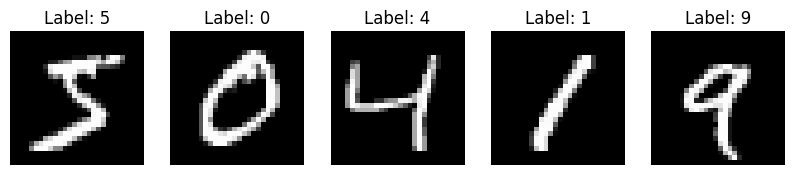

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {int(y[i] * 9)}")
    ax.axis("off")
plt.show()


Train R^2 Score: 0.6154
Test R^2 Score: 0.6021


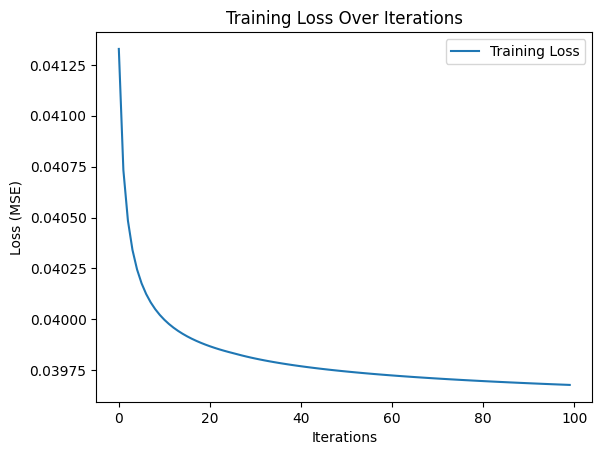

In [22]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mnist = torchvision.datasets.MNIST(root="./data", train=True, download=True)

X = np.array([np.array(img).flatten() for img, _ in mnist], dtype=np.float32)
y = np.array([label for _, label in mnist], dtype=np.float32)

y = MinMaxScaler().fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sgd = SGDRegressor(
    random_state=1,
    warm_start=True
)

losses = []
n_iterations = 100
for _ in range(n_iterations):
    sgd.partial_fit(X_train, y_train)
    y_pred = sgd.predict(X_train)
    loss = mean_squared_error(y_train, y_pred)
    losses.append(loss)

train_score = sgd.score(X_train, y_train)
test_score = sgd.score(X_test, y_test)

print(f"Train R^2 Score: {train_score:.4f}")
print(f"Test R^2 Score: {test_score:.4f}")

plt.plot(range(n_iterations), losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Iterations")
plt.legend()
plt.show()